Configure path envirorment

In [1]:
import sys
import os
sys.path.append(os.getcwd()[:-4])

Import Libraries

In [2]:
import numpy as np
from examples.binary_function_otimizer import BinaryFunctionOtimizer
from src.crossover.one_point_crossover import OnePointCrossover
from src.mutation.position_mutation import PositionMutation
from src.selection.roulette_selection import RouletteSelection

import matplotlib.pyplot as plt
from matplotlib import animation
plt.style.use('ggplot')

Defining Function to Otimize

In [3]:
def ackley_function(x):
    return - 20*np.exp(-0.2*np.sqrt(np.mean(np.square(x)))) \
           - np.exp(np.mean(np.cos(2*np.pi*x))) \
           + 20 + np.e

Visualizing the function

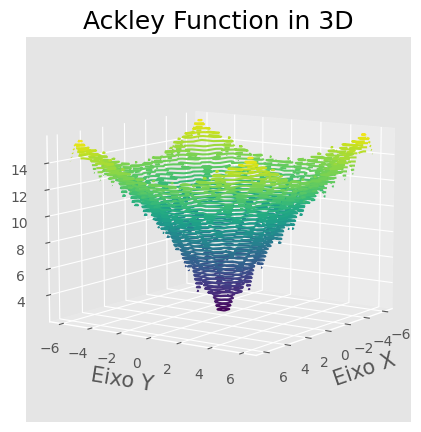

In [4]:
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x, y)
Z = np.copy(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i][j] = ackley_function(np.array([X[i][j], Y[i][j]]))

fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50)
ax.set_title('Ackley Function in 3D', fontsize=18)
ax.set_xlabel('Eixo X', fontsize=15)
ax.set_ylabel('Eixo Y', fontsize=15)
ax.set_zlabel('Eixo Z', fontsize=15)
ax.view_init(10, 35)
plt.show()

Creating the genetic algorithm model

In [5]:
model = BinaryFunctionOtimizer(
    n_individuals=100,
    n_genes=18,  # 2 variables with 9 bits each
    n_bits=6,
    n_generations=100,
    min_value=-2,
    max_value=2,
    otimizer=np.argmin,  # Minimize the function
    function=ackley_function
)

model.set_selection(RouletteSelection())
model.set_crossover(OnePointCrossover())
model.set_mutation(PositionMutation())


Running the Optimization

In [9]:
best_individual = model.simulate()
print('Individual:', model.binary_to_value([best_individual]))
print('Best result:', model.fitness([best_individual])[0])
best_individual

Individual: [[-0.03174603 -0.03174603 -0.03174603]]
Best result: 0.1799478151580023


array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

Visualizing the Fitness Evolution

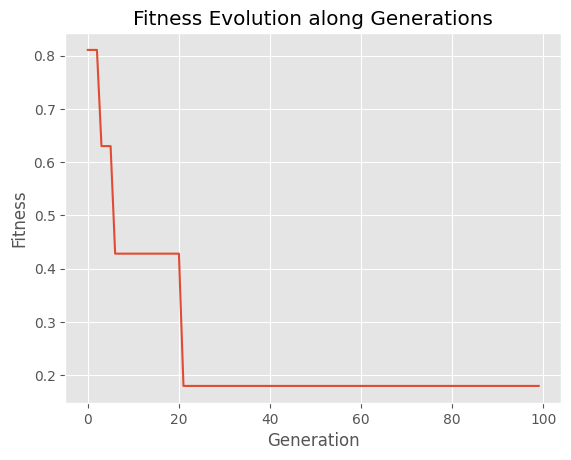

In [7]:
fitness_evolution = [min(model.fitness(generation)) for generation in model.history_individuals]
plt.plot(fitness_evolution)
plt.title('Fitness Evolution along Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()